# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Descripción de las tarifas

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación puedes ver una descripción de las tarifas:

### Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.

### Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.

## Inicialización

In [2]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math


## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames

llamadas_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
mensajes_df = pd.read_csv('/datasets/megaline_messages.csv')
planes_df = pd.read_csv('/datasets/megaline_plans.csv')
usuarios_df = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

planes_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
# Imprime una muestra de los datos para las tarifas

planes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De inicio se puede observar el nombre del plan (plan_name), para que sea más claro lo cambiare a plan_id

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
planes_df.rename(columns={'plan_name':'plan_id'}, inplace=True)

In [7]:
planes_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

usuarios_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [9]:
# Imprime una muestra de datos para usuarios

usuarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
usuarios_df.rename(columns={'plan':'plan_id'}, inplace=True)  

#inplace=True para que se modifique en la misma tabla y no se duplique

In [11]:
usuarios_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan_id,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
usuarios_df['reg_date'] = pd.to_datetime(usuarios_df['reg_date'], format='%Y-%m-%d')
usuarios_df['reg_mes'] = pd.DatetimeIndex(usuarios_df['reg_date']).month

In [13]:
usuarios_df['churn_date'] = pd.to_datetime(usuarios_df['churn_date'], format='%Y-%m-%d')
usuarios_df['churn_mes'] = pd.DatetimeIndex(usuarios_df['churn_date']).month

In [14]:
usuarios_df.info()
usuarios_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_id     500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   reg_mes     500 non-null    int64         
 9   churn_mes   34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


,user_id,first_name,last_name,age,city,reg_date,plan_id,churn_date,reg_mes,churn_mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


## Llamadas

In [15]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

llamadas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprime una muestra de datos para las llamadas

llamadas_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
llamadas_df.rename(columns={'id':'call_id'}, inplace=True)
llamadas_df.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
llamadas_df.isna().sum()

call_id      0
user_id      0
call_date    0
duration     0
dtype: int64

In [19]:
llamadas_df.duplicated().sum()

0

In [20]:
llamadas_df.duplicated(subset=['call_id', 'user_id']).sum()

0

In [21]:
llamadas_df['call_date'] = pd.to_datetime(llamadas_df['call_date'], format='%Y-%m-%d')
llamadas_df['mes'] = pd.DatetimeIndex(llamadas_df['call_date']).month

In [22]:
llamadas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   mes        137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


In [23]:
llamadas_df.head()

,call_id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [24]:
llamadas_df.describe()

,user_id,duration,mes
count,137735.000000,137735.000000,137735.000000
mean,1247.658046,6.745927,9.320797
std,139.416268,5.839241,2.412550
min,1000.000000,0.000000,1.000000
25%,1128.000000,1.290000,8.000000
50%,1247.000000,5.980000,10.000000
75%,1365.000000,10.690000,11.000000
max,1499.000000,37.600000,12.000000


## Mensajes

In [25]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

mensajes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Imprime una muestra de datos para los mensajes

mensajes_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [27]:
mensajes_df.rename(columns={'id':'mensaje_id'}, inplace=True)
mensajes_df.head()

,mensaje_id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [28]:
mensajes_df['message_date'] = pd.to_datetime(mensajes_df['message_date'], format='%Y-%m-%d')
mensajes_df['mes'] = pd.DatetimeIndex(mensajes_df['message_date']).month
mensajes_df.info()
mensajes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mensaje_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


,mensaje_id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [29]:
mensajes_df.duplicated().sum()

0

## Internet

In [30]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [32]:
internet_df.rename(columns={'id':'internet_id'}, inplace=True)
internet_df

,internet_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [33]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df['mes'] = pd.DatetimeIndex(internet_df['session_date']).month
internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [34]:
internet_df.duplicated().sum()

0

In [35]:
internet_df.describe()

,user_id,mb_used,mes
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


In [36]:
(len(internet_df.query('mb_used == 0'))/len(internet_df))*100 #porcentaje de usuaruios que NO usan MB

13.11423801574052

In [37]:
internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [38]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
planes_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [39]:
def redondeo_llamadas(duracion):
    redondeo = math.ceil(duracion)
    return redondeo

In [40]:
llamadas_df['duracion_redondeada'] = llamadas_df['duration'].apply(redondeo_llamadas)

In [41]:
llamadas_df.head()

,call_id,user_id,call_date,duration,mes,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [42]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.


llamadas_analytics = llamadas_df.pivot_table(index=['user_id', 'mes'], values='duracion_redondeada', aggfunc=['sum', 'count'])
llamadas_analytics.head(10)

sum               count
            duracion_redondeada duracion_redondeada
user_id mes                                        
1000    12                  124                  16
1001    8                   182                  27
        9                   315                  49
        10                  393                  65
        11                  426                  64
        12                  412                  56
1002    10                   59                  11
        11                  386                  55
        12                  384                  47
1003    12                 1104                 149

In [43]:
llamadas_analytics.columns = ['minutos_usados', 'llamadas_hechas'] #cambio el nommbre de las columnas para que sea más comprensible
llamadas_analytics.head()

minutos_usados  llamadas_hechas
user_id mes                                 
1000    12              124               16
1001    8               182               27
        9               315               49
        10              393               65
        11              426               64

In [44]:
llamadas_analytics = llamadas_analytics.reset_index() #Resetaeo el indice
llamadas_analytics

,user_id,mes,minutos_usados,llamadas_hechas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [45]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

mensajes_analytics = mensajes_df.pivot_table(index=['user_id', 'mes'], values='mensaje_id', aggfunc='count')
mensajes_analytics.head()

mensaje_id
user_id mes            
1000    12           11
1001    8            30
        9            44
        10           53
        11           36

In [46]:
mensajes_analytics.columns = ['cantidad_de_mensajes'] #cambio el nombre de la culumna, para mas claridad
mensajes_analytics = mensajes_analytics.reset_index() #reseteo el indice
mensajes_analytics

,user_id,mes,cantidad_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [47]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [48]:
internet_analytics = internet_df.pivot_table(index=['user_id', 'mes'], values='mb_used', aggfunc='sum')
internet_analytics

mb_used
user_id mes          
1000    12    1901.47
1001    8     6919.15
        9    13314.82
        10   22330.49
        11   18504.30
...               ...
1498    12   23137.69
1499    9    12984.76
        10   19492.43
        11   16813.83
        12   22059.21

[2277 rows x 1 columns]

In [49]:
internet_analytics.columns = ['total_datos_usados'] #Cambio el nombre de la culumna a mb_used  'total_datos_usados'
internet_analytics

total_datos_usados
user_id mes                    
1000    12              1901.47
1001    8               6919.15
        9              13314.82
        10             22330.49
        11             18504.30
...                         ...
1498    12             23137.69
1499    9              12984.76
        10             19492.43
        11             16813.83
        12             22059.21

[2277 rows x 1 columns]

In [50]:
internet_analytics = internet_analytics.reset_index() #Reseteo el indice
internet_analytics

,user_id,mes,total_datos_usados
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [51]:
def datos_redondeo(mb):
    redondeo = math.ceil(mb/1024)
    return redondeo

In [52]:
internet_analytics['total_datos_usados_redondeado_GB'] = internet_analytics['total_datos_usados'].apply(datos_redondeo)

In [53]:
internet_analytics

,user_id,mes,total_datos_usados,total_datos_usados_redondeado_GB
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


In [54]:
llamadas_analytics.head()

,user_id,mes,minutos_usados,llamadas_hechas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


In [55]:
mensajes_analytics.head()

,user_id,mes,cantidad_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [56]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

llamadas_y_mensajes = llamadas_analytics.merge(mensajes_analytics, on=['user_id', 'mes'], how='outer')
llamadas_y_mensajes


,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes
0,1000,12,124.0,16.0,11.0
1,1001,8,182.0,27.0,30.0
2,1001,9,315.0,49.0,44.0
3,1001,10,393.0,65.0,53.0
4,1001,11,426.0,64.0,36.0
...,...,...,...,...,...
2286,1349,10,NaN,NaN,76.0
2287,1349,11,NaN,NaN,72.0
2288,1349,12,NaN,NaN,61.0
2289,1361,5,NaN,NaN,2.0


In [57]:
tabla_consumo = llamadas_y_mensajes.merge(internet_analytics, on=['user_id', 'mes'], how='outer')
tabla_consumo

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [58]:
plan_analytics = usuarios_df[['user_id', 'plan_id', 'city']]
plan_analytics


,user_id,plan_id,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [59]:
tabla_consumo_planes = tabla_consumo.merge(plan_analytics, on=['user_id'], how='outer')
tabla_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


In [60]:
# Añade la información de la tarifa

surf_usd_monthly_pay = 20
surf_messages_month = 50
surf_minutes_month = 500
surf_mb_per_month = 15
surf_usd_per_gb = 10
surf_usd_per_message = 0.03
surf_usd_per_minute = 0.03

ultimate_usd_monthly_pay = 70
ultimate_messages_month = 1000
ultimate_minutes_month = 3000
ultimate_mb_per_month = 30
ultimate_usd_per_gb = 7
surf_usd_per_message = 0.01
ultimate_usd_per_minute = 0.01

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [61]:
# Calcula el ingreso mensual para cada usuario



## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [62]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

def llamadas_por_cobrar(fila):
    plan = fila['plan_id']
    minutos_usados = fila['minutos_usados']
    
    minutos_cobrables = 0
    
    if plan == 'surf':
        if minutos_usados > surf_minutes_month:
            minutos_cobrables = minutos_usados - surf_minutes_month
    elif plan == 'ultimate':
        if minutos_usados > ultimate_minutes_month:
            minutos_cobrables = minutos_usados - ultimate_minutes_month
            
    return minutos_cobrables
        

In [63]:
tabla_consumo_planes['minutos_cobrables'] = tabla_consumo_planes.apply(llamadas_por_cobrar, axis = 1)
tabla_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city,minutos_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0


In [64]:
tabla_consumo_planes.query('minutos_cobrables != 0') #Usuarios que pagan minutos extras

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city,minutos_cobrables
9,1003,12.0,1104.0,149.0,50.0,27044.14,27.0,surf,"Tulsa, OK MSA",604.0
23,1007,10.0,645.0,80.0,59.0,37885.63,37.0,surf,"Grand Rapids-Kentwood, MI MSA",145.0
24,1007,11.0,524.0,80.0,48.0,24334.00,24.0,surf,"Grand Rapids-Kentwood, MI MSA",24.0
25,1007,12.0,617.0,87.0,50.0,29069.28,29.0,surf,"Grand Rapids-Kentwood, MI MSA",117.0
29,1009,5.0,534.0,71.0,NaN,20389.40,20.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",34.0
...,...,...,...,...,...,...,...,...,...,...
2205,1489,10.0,518.0,66.0,84.0,14695.08,15.0,surf,"Detroit-Warren-Dearborn, MI MSA",18.0
2220,1491,10.0,585.0,75.0,51.0,8480.09,9.0,surf,"Grand Rapids-Kentwood, MI MSA",85.0
2235,1494,10.0,616.0,78.0,38.0,14498.50,15.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",116.0
2236,1494,11.0,509.0,82.0,35.0,18405.82,18.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",9.0


In [65]:
len(tabla_consumo_planes.query('minutos_cobrables > 0'))/len(tabla_consumo_planes) 
#24% de las personas pagan minutos extras

0.2457663916630482

In [66]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [84]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_llamadas_ultimate = tabla_consumo_planes[tabla_consumo_planes['plan_id']=='ultimate']['minutos_usados'].mean()
media_llamadas_ultimate



434.67601683029454

In [85]:
varianza_llamadas_ultimate = tabla_consumo_planes[tabla_consumo_planes['plan_id']=='ultimate']['minutos_usados'].var()
varianza_llamadas_ultimate


56573.632247033434

In [86]:
media_llamadas_surf = tabla_consumo_planes[tabla_consumo_planes['plan_id']=='surf']['minutos_usados'].mean()
media_llamadas_surf

436.51974110032364

In [87]:
varianza_llamadas_surf = tabla_consumo_planes[tabla_consumo_planes['plan_id']=='surf']['minutos_usados'].var()
varianza_llamadas_surf

52571.06324345624

In [68]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

In [69]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

def mensajes_por_cobrar(fila):
    plan = fila['plan_id']
    numero_de_mensajes = fila['cantidad_de_mensajes']
    
    mensajes_cobrables = 0
    
    if plan == 'surf':
        if numero_de_mensajes > surf_messages_month:
            mensajes_cobrables = numero_de_mensajes - surf_messages_month
    elif plan == 'ultimate':
        if numero_de_mensajes > ultimate_messages_month:
            mensajes_cobrables = numero_de_mensajes - ultimate_messages_month
    return mensajes_cobrables

In [70]:
tabla_consumo_planes['mensajes_cobrables'] = tabla_consumo_planes.apply(mensajes_por_cobrar, axis = 1)
tabla_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city,minutos_cobrables,mensajes_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0


In [71]:
len(tabla_consumo_planes.query('mensajes_cobrables > 0'))/len(tabla_consumo_planes) 
#El 14% se cobra de mensajes extras

0.14763352149370387

In [72]:
tabla_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city,minutos_cobrables,mensajes_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0


In [73]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [74]:
def datos_cobrables(fila):
    plan = fila['plan_id']
    datos_consumidos = fila['total_datos_usados_redondeado_GB']
    
    datos_cobrables = 0
    
    if plan == 'surf':
        if datos_consumidos > surf_mb_per_month:
            datos_cobrables = datos_consumidos - surf_mb_per_month
    elif plan == 'ultimate':
        if datos_consumidos > ultimate_mb_per_month:
            datos_cobrables = datos_consumidos - ultimate_mb_per_month
    return datos_cobrables

In [75]:
tabla_consumo_planes['datos_cobrables'] = tabla_consumo_planes.apply(datos_cobrables, axis = 1)

In [76]:
tabla_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0


In [77]:
len(tabla_consumo_planes.query('datos_cobrables > 0'))/len(tabla_consumo_planes)
#El 41% de personas consumen mas datos de los que incluye el plan.

0.4133738601823708

In [78]:
tabla_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [79]:
def rentabilidad_mensual(fila):
    plan = fila['plan_id']
    llamadas_cobrables = fila['minutos_cobrables']
    mensajes_cobrables = fila['mensajes_cobrables']
    datos_cobrables = fila['datos_cobrables']
    rentabilidad = 0
    
    if plan == 'surf':
        rentabilidad = surf_usd_monthly_pay + (llamadas_cobrables*surf_usd_per_minute) + (mensajes_cobrables*surf_usd_per_message) + (datos_cobrables*surf_usd_per_gb)
    elif plan == 'ultimate':
        rentabilidad = ultimate_usd_monthly_pay + (llamadas_cobrables*ultimate_usd_per_minute) + (mensajes_cobrables*surf_usd_per_message) + (datos_cobrables*ultimate_usd_per_gb)
    return rentabilidad       

In [80]:
tabla_consumo_planes['rentabilidad_mensual'] = tabla_consumo_planes.apply(rentabilidad_mensual, axis=1 )

In [101]:
tabla_consumo_planes.head(5)

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_datos_usados,total_datos_usados_redondeado_GB,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables,rentabilidad_mensual
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0,90.03
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0,60.00


In [88]:
variables = ['minutos_usados', 'cantidad_de_mensajes', 'total_datos_usados_redondeado_GB']

In [89]:
planes = ['surf', 'ultimate']

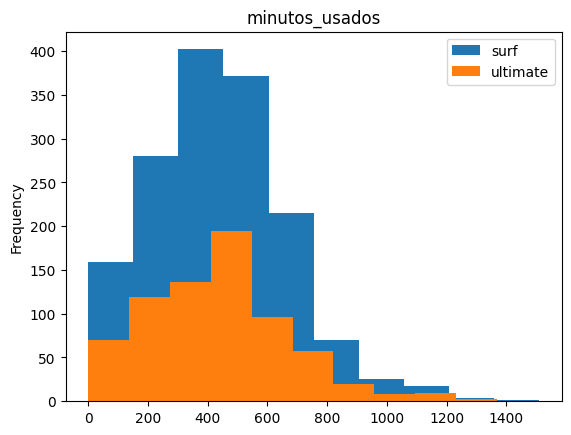

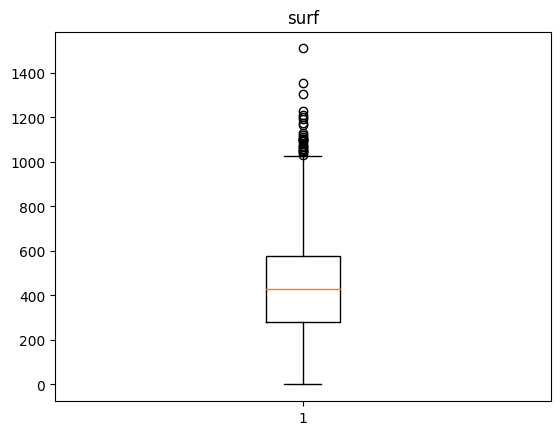

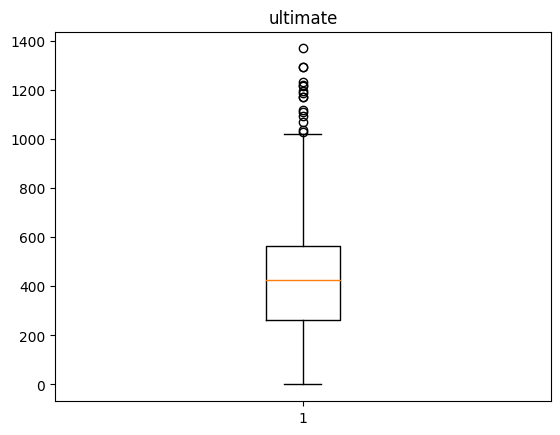

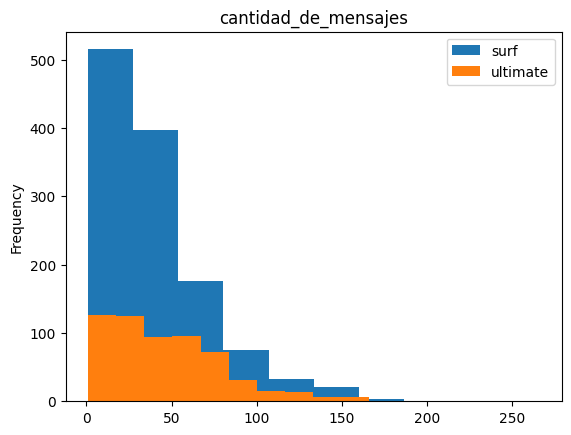

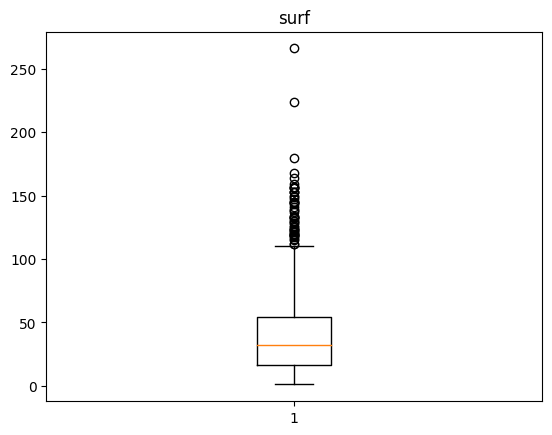

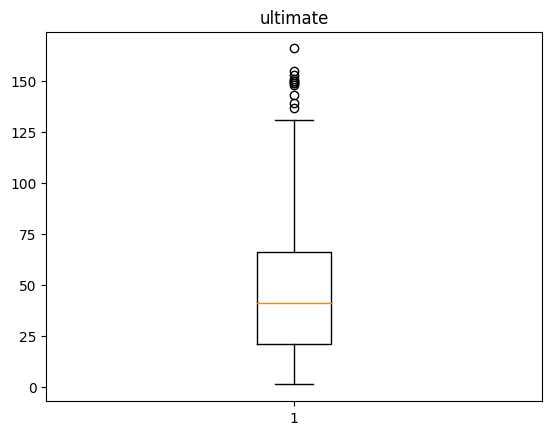

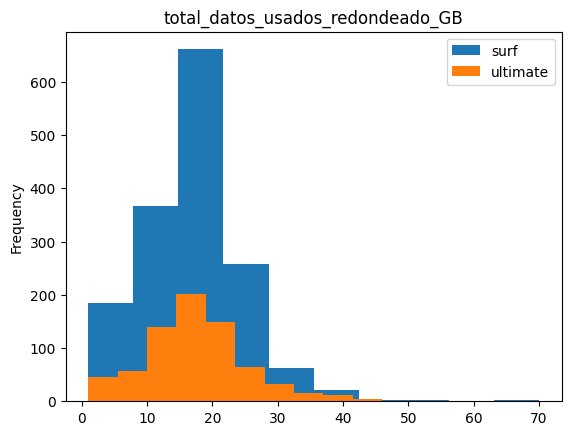

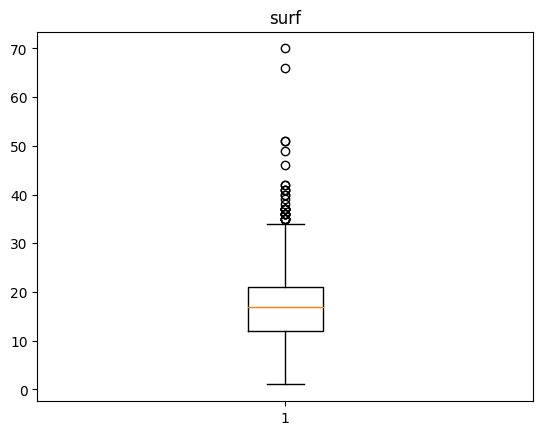

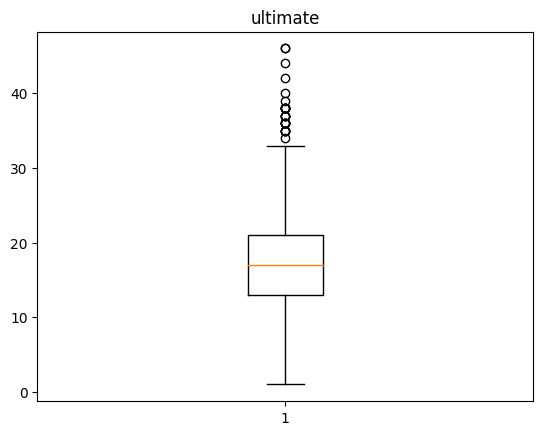

In [90]:
for metrica in variables:
    for plan in planes:
        tabla_consumo_planes[tabla_consumo_planes['plan_id'] == plan][metrica].plot(kind='hist')
    plt.title(metrica)
    plt.legend(planes)
    plt.show()
    
    for plan in planes:
        plt.boxplot(tabla_consumo_planes[tabla_consumo_planes['plan_id'] == plan][metrica].dropna())
        plt.title(plan)
        plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [82]:
# Prueba las hipótesis

In [91]:
plans = ['surf', 'ultimate']

for plan in plans:
    rentabilidad_suma = tabla_consumo_planes[tabla_consumo_planes['plan_id'] == plan]['rentabilidad_mensual'].sum()
    rentabilidad_promedio_mensual = tabla_consumo_planes[tabla_consumo_planes['plan_id'] == plan]['rentabilidad_mensual'].mean()
    print(f'La rentabilidad total del plan {plan} es de : {rentabilidad_suma}')
    print(f'La rentabilidad mensual promedio del plan {plan} es de : {rentabilidad_promedio_mensual}')

La rentabilidad total del plan surf es de : 95390.56
La rentabilidad mensual promedio del plan surf es de : 60.41200759974667
La rentabilidad total del plan ultimate es de : 52346.0
La rentabilidad mensual promedio del plan ultimate es de : 72.3011049723757


In [93]:
alpha = 0.05

sample_1 = tabla_consumo_planes.query('plan_id == "surf"')['rentabilidad_mensual']

In [94]:
sample_1

1       20.00
2       20.00
3       90.03
4       60.00
5       60.00
        ...  
2295    20.00
2298    20.00
2299    20.00
2300    20.00
2302    20.00
Name: rentabilidad_mensual, Length: 1579, dtype: float64

In [95]:
sample_2 = tabla_consumo_planes.query('plan_id == "ultimate"')['rentabilidad_mensual']

In [96]:
sample_2

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2292    70.0
2293    70.0
2296    70.0
2297    70.0
2301    70.0
Name: rentabilidad_mensual, Length: 724, dtype: float64

1era Hipotesis Nula = Los promedios mensuales del Plan Surf son iguales al Plan Ultimate

In [97]:
resultados = st.ttest_ind(sample_1, sample_2, equal_var=False)

print(f'p-value: {resultados.pvalue}')

p-value: 5.268703695438697e-16


In [98]:
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [83]:
# Prueba las hipótesis

In [99]:
usuarios_df['city']

0          Atlanta-Sandy Springs-Roswell, GA MSA
1                Seattle-Tacoma-Bellevue, WA MSA
2           Las Vegas-Henderson-Paradise, NV MSA
3                                  Tulsa, OK MSA
4                Seattle-Tacoma-Bellevue, WA MSA
                         ...                    
495    New York-Newark-Jersey City, NY-NJ-PA MSA
496                 New Orleans-Metairie, LA MSA
497       Los Angeles-Long Beach-Anaheim, CA MSA
498    New York-Newark-Jersey City, NY-NJ-PA MSA
499            Orlando-Kissimmee-Sanford, FL MSA
Name: city, Length: 500, dtype: object

In [100]:
promedio_ingresos_general = tabla_consumo_planes['rentabilidad_mensual'].mean()
promedio_ingresos_ny = tabla_consumo_planes[tabla_consumo_planes['city'].str.contains('NY-NJ')]['rentabilidad_mensual'].mean()
promedio_ingresos_resto_de_ciudades = tabla_consumo_planes[~tabla_consumo_planes['city'].str.contains('NY-NJ', case=False)]['rentabilidad_mensual'].mean()
print(f'La rentabilidad mensual promedio general es de : {promedio_ingresos_general}')
print(f'La rentabilidad mensual promedio en la ciudad de  NY es de : {promedio_ingresos_ny}')
print(f'La rentabilidad mensual promedio en el resto de ciudades es de : {promedio_ingresos_resto_de_ciudades}')


    

La rentabilidad mensual promedio general es de : 64.14961354754668
La rentabilidad mensual promedio en la ciudad de  NY es de : 59.896058201058196
La rentabilidad mensual promedio en el resto de ciudades es de : 64.98485714285715


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]